# C1 - Exploratory data analysis

In [22]:
import pandas as pd
from scipy.stats import trim_mean
import numpy as np
import wquantiles
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
file_path = '../../data/state.csv'
state = pd.read_csv(file_path)

## Estimates of location

In [24]:
state['Population'].mean()

np.float64(6162876.3)

In [25]:
trim_mean(state['Population'], 0.1)

np.float64(4783697.125)

In [26]:
state['Population'].median()

np.float64(4436369.5)

In [27]:
np.average(state['Murder.Rate'],weights=state['Population'])

np.float64(4.445833981123393)

In [28]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

np.float64(4.4)

## Estimates of variability

In [29]:
state['Population'].std()

np.float64(6848235.347401142)

In [30]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

np.float64(4847308.0)

In [31]:
from statsmodels import robust

In [32]:
robust.scale.mad(state['Population'])

np.float64(3849876.1459979336)

## Exploring the data distribution

In [33]:
state['Murder.Rate'].quantile([.05,0.25,.5,.75,.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

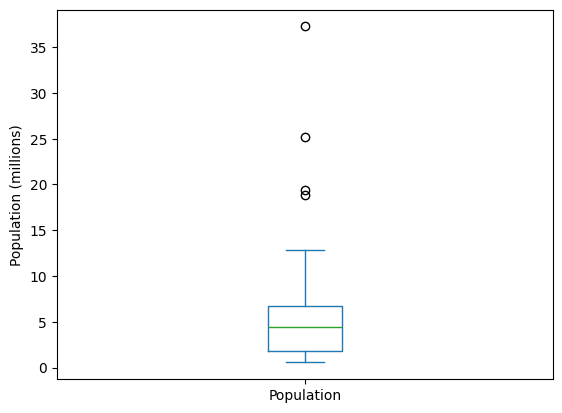

In [34]:
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

In [35]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0.5, 0, 'Population (millions)')

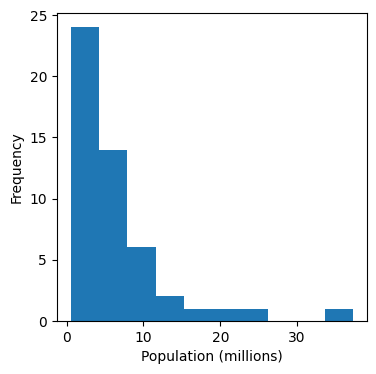

In [36]:
ax = (state['Population']/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100000)')

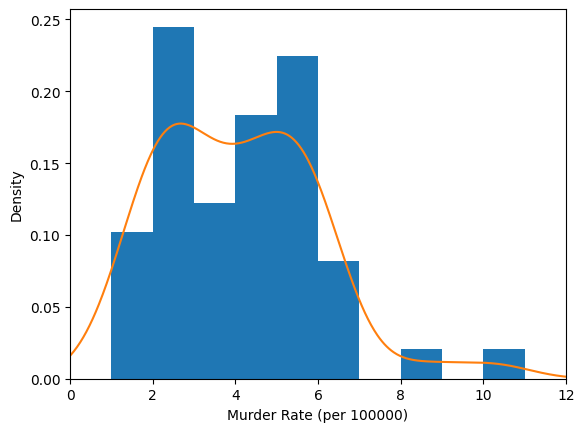

In [37]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100000)')

## Exploring binary and categorical data

In [38]:
dfw_file_path = '../../data/dfw_airline.csv'
dfw = pd.read_csv(dfw_file_path)

Text(0, 0.5, 'Count')

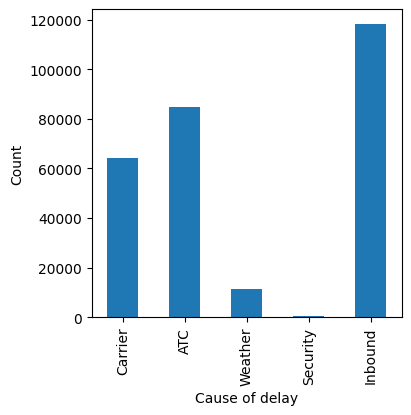

In [39]:
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

## Correlation

In [40]:
sp500_px_file_path = '../../data/sp500_data.csv.gz'
sp500_px = pd.read_csv(sp500_px_file_path, parse_dates=True, index_col=0)

In [41]:
sp500_sym_file_path = '../../data/sp500_sectors.csv'
sp500_sym = pd.read_csv(sp500_sym_file_path)

<Axes: >

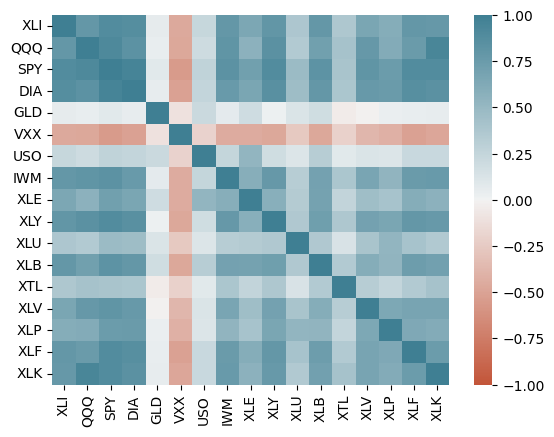

In [42]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] =='etf']['symbol']]
sns.heatmap(etfs.corr(),vmin=-1,vmax=1,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

In [43]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

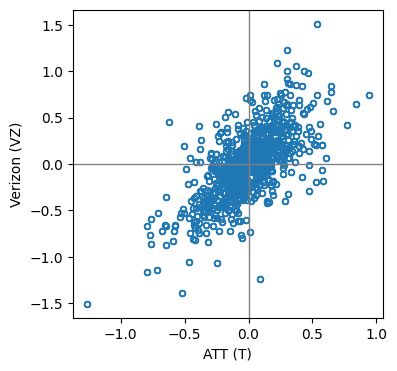

In [44]:
ax =telecom.plot.scatter(x='T',y='VZ',figsize=(4,4),marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='gray', lw=1)
ax.axvline(0, color='gray', lw=1)

## Exploring 2 or more variables

In [45]:
kc_tax_file_path = '../../data/kc_tax.csv.gz'
kc_tax = pd.read_csv(kc_tax_file_path)

In [46]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax Assessed Value ($)')

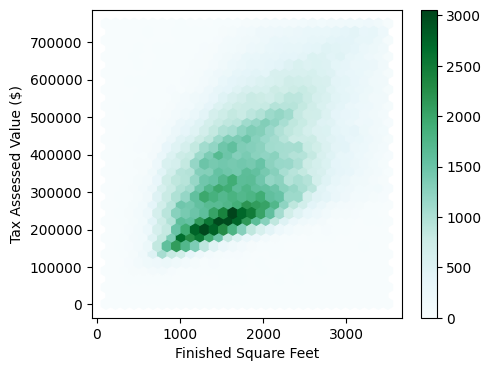

In [47]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',gridsize=30,sharex=False,figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value ($)')

In [ ]:
ax = sns.kdeplot(x=kc_tax0.SqFtTotLiving, y=kc_tax0.TaxAssessedValue, ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value ($)')

## Two categorical variables

In [48]:
lc_loans_path = '../../data/lc_loans.csv'
lc_loans = pd.read_csv(lc_loans_path)

In [49]:
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)

df = crosstab.loc['A':'G', :].copy()
df.loc[:, 'Charged Off': 'Late'] = df.loc[:, 'Charged Off': 'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df

C:\Users\thibo\AppData\Local\Temp\ipykernel_8396\1277607051.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Charged Off': 'Late'] = df.loc[:, 'Charged Off': 'Late'].div(df['All'], axis=0)
C:\Users\thibo\AppData\Local\Temp\ipykernel_8396\1277607051.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Charged Off': 'Late'] = df.loc[:, 'Charged Off': 'Late'].div(df['All'], axis=0)
C:\Users\thibo\AppData\Local\Temp\ipykernel_8396\1277607051.py:4: FutureWarning: Setting an item of incompatibl

In [50]:
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [51]:
airline_stats_file_path = '../../data/airline_stats.csv'
airline_stats = pd.read_csv(airline_stats_file_path)

Text(0.5, 0.98, '')

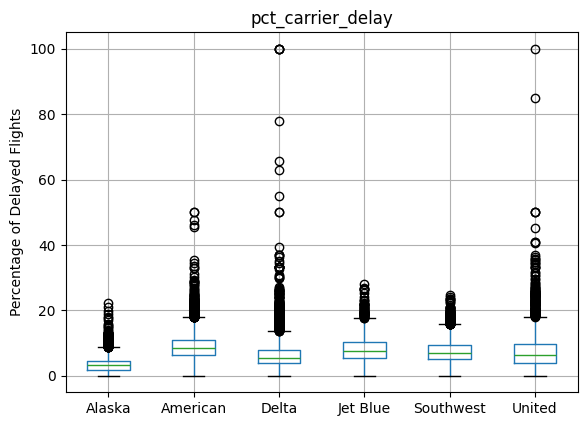

In [52]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Percentage of Delayed Flights')
plt.suptitle('')

Text(0, 0.5, 'Percentage of Delayed Flights')

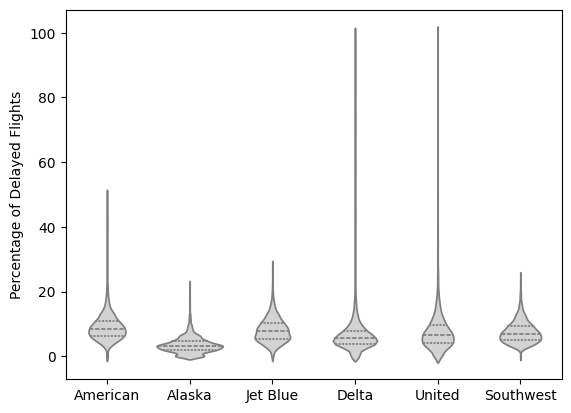

In [56]:
ax = sns.violinplot(x=airline_stats.airline, y=airline_stats.pct_carrier_delay, inner='quartile', color='lightgray')
ax.set_xlabel('')
ax.set_ylabel('Percentage of Delayed Flights')

## Visualizing multiple variables

In [58]:
zip_codes = [98188,98105,98108,98126]
kc_tax_zip = kc_tax.loc[kc_tax.ZipCode.isin(zip_codes), :]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


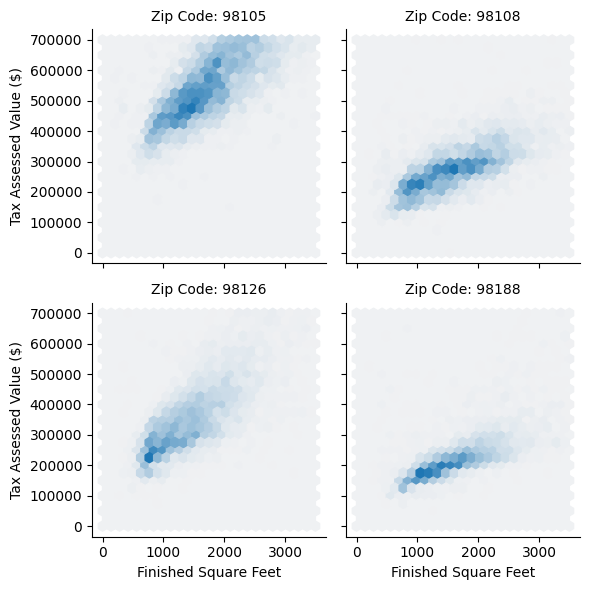

In [59]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0,3500,0,700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value ($)')
g.set_titles('Zip Code: {col_name:.0f}')